# Turbulence, project one.

You will be analyzing data from a modern wind
tunnel experiment, and relating the ndings to the predictions made by the Kolmogorov theory
(hereafter called K41). 

You will study turbulence at finite Reynolds numbers based on experimental data obtained in
a modern wind tunnel using state-of-the-art instrumentation. Specifically, you will
> * Task 1: Process and analyse experimental data using Python or Matlab.
> * Task 2: Interpret the data in view of K41 turbulence theory and write a report presenting,
discussing and interpreting the findings.

### Slice text files to first 3003 lines:

In [48]:
from itertools import islice

# first file
with open("veldata1.txt", "r") as myfile:
    head = list(islice(myfile, 30003))

# always remember, use files in a with statement
with open("veldata1part.txt", "w") as f2:
    for item in head:
        f2.write(item)
        
with open("veldata2.txt", "r") as myfile:
    head = list(islice(myfile, 30003))

# always remember, use files in a with statement
with open("veldata2part.txt", "w") as f2:
    for item in head:
        f2.write(item)
        
with open("veldata3.txt", "r") as myfile:
    head = list(islice(myfile, 30003))

# always remember, use files in a with statement
with open("veldata3part.txt", "w") as f2:
    for item in head:
        f2.write(item)



## Loading data
The files veldata1.txt, veldata2.txt and veldata3.txt contain a time series of the downstream
velocity from a wind tunnel experiment in the Warhaft Wind and Turbulence Tunnel
at Cornell University1, in units of m/s for dierent Reynolds numbers. The data were acquired
in turbulent air at ambient pressure, using a hot wire of length 1 mm, positioned a few meters
downstream of an array of randomly rotating paddles about 100 mm in size. The first three
lines of each file report the number of data blocks acquired, the number of datapoints per block
and the sampling frequency in Hz, as shown in the example box below.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import scipy

with open('veldata1part.txt') as f1:
    content1 = f1.readlines()
content1 = [x.strip() for x in content1] 
vel1 = [float(x) for x in content1]
db1, dpb1, sampFreq1 = vel1[0], vel1[1], vel1[2]
vel1 = vel1[3:]

with open('veldata2part.txt') as f2:
    content2 = f2.readlines()
content2 = [x.strip() for x in content2] 
vel2 = [float(x) for x in content2]
db2, dpb2, sampFreq2 = vel2[0], vel2[1], vel2[2]
vel2 = vel2[3:]

with open('veldata3part.txt') as f3:
    content3 = f3.readlines()
content3 = [x.strip() for x in content3] 
vel3 = [float(x) for x in content3]
db3, dpb3, sampFreq3 = vel3[0], vel3[1], vel3[2]
vel3 = vel3[3:]
#print(datablocks, dataPoiBlock, sampFreq, listVel)

# Convert lists to numpy arrays:

vel1np = np.asarray(vel1)
vel2np = np.asarray(vel2)
vel3np = np.asarray(vel3)

mean1 = vel1np.mean()
mean2 = vel2np.mean()
mean3 = vel3np.mean()

var1 = vel1np.var()
var2 = vel2np.var()
var3 = vel3np.var()

std1 = vel1np.std()
std2 = vel2np.std()
std3 = vel3np.std()

print(std1, std2, std3)
print(var1, var2, var3, mean1, mean2, mean3, len(vel3np),len(vel2np), len(vel1np), np.shape(vel3np))
xx = np.arange(len(vel1np))


0.6056391976117894 1.479554523565877 1.8537010890740282
0.36679883768385213 2.1890815882042487 3.436207727634238 5.314689927133334 10.019975723433332 13.548108218433331 30000 30000 30000 (30000,)


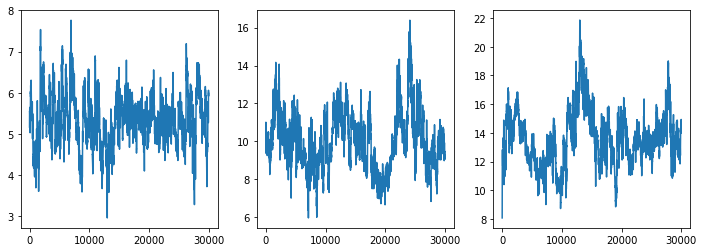

In [53]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.plot(xx,vel1np)

ax2 = fig.add_subplot(132)
ax2.plot(xx,vel2np)

ax3 = fig.add_subplot(133)
ax3.plot(xx,vel3np)

plt.show()

### Next part:
To investigate the influence of the Reynolds number, carry out all analysis steps for all provided datasets. Where appropriate, combine the data for diferent flow-speeds in a single plot to simplify comparisons.

## 1.1 Velocity Signal in the Spatial Domain
With x as the downstream coordinate, interpret the time series as a spatial measurement U(x) via Taylor's frozen flow hypothesis. Quickly discuss to what extent this interpretation is or is not appropriate for the given datasets. Give the relevant velocity ratio and plot the velocity signal against x (Plot A). Is the velocity continuous between two data blocks? If not, keep this in mind when calculating correlations, increments and structure functions.
```
In practical terms, the limits of Taylor’s hypothesis are determined by how large the
mean velocity must be relative to the fluctuations. Recently Yakhot [6] has pointed out
that the corrections to Taylor’s hypothesis could well be of the same order as corrections
to the standard model of turbulence, Kolmogorov’s 1941 theory [7,8].
```
